 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [525]:
import matplotlib.pyplot as plot

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from pandas import DataFrame
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [526]:
# Reading whale returns

whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [527]:
whale_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

In [528]:
# Count nulls

whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [529]:
# Drop nulls

whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [530]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [531]:
# Count nulls

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [532]:
# Drop nulls

algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [533]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_history.sort_index(inplace=True) 
sp500_history

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [534]:
# Check Data Types

sp500_history.dtypes

Close    object
dtype: object

In [535]:
# Fix Data Types

sp500_history['Close'] = sp500_history['Close'].replace(['\$'], [''], regex=True)
sp500_history['Close'] = sp500_history['Close'].astype('float64')

sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [536]:
# Calculate Daily Returns

sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [537]:
# Drop nulls

sp500_returns.dropna(inplace=True)
sp500_returns.isnull().sum()
sp500_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [538]:
# Rename Column

columns = ["S&P 500"]
sp500_returns.columns = columns
sp500_returns.head()

# sp500_returns.columns

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [539]:
# Concatenate all DataFrames into a single DataFrame

combined1 = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
combined1.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

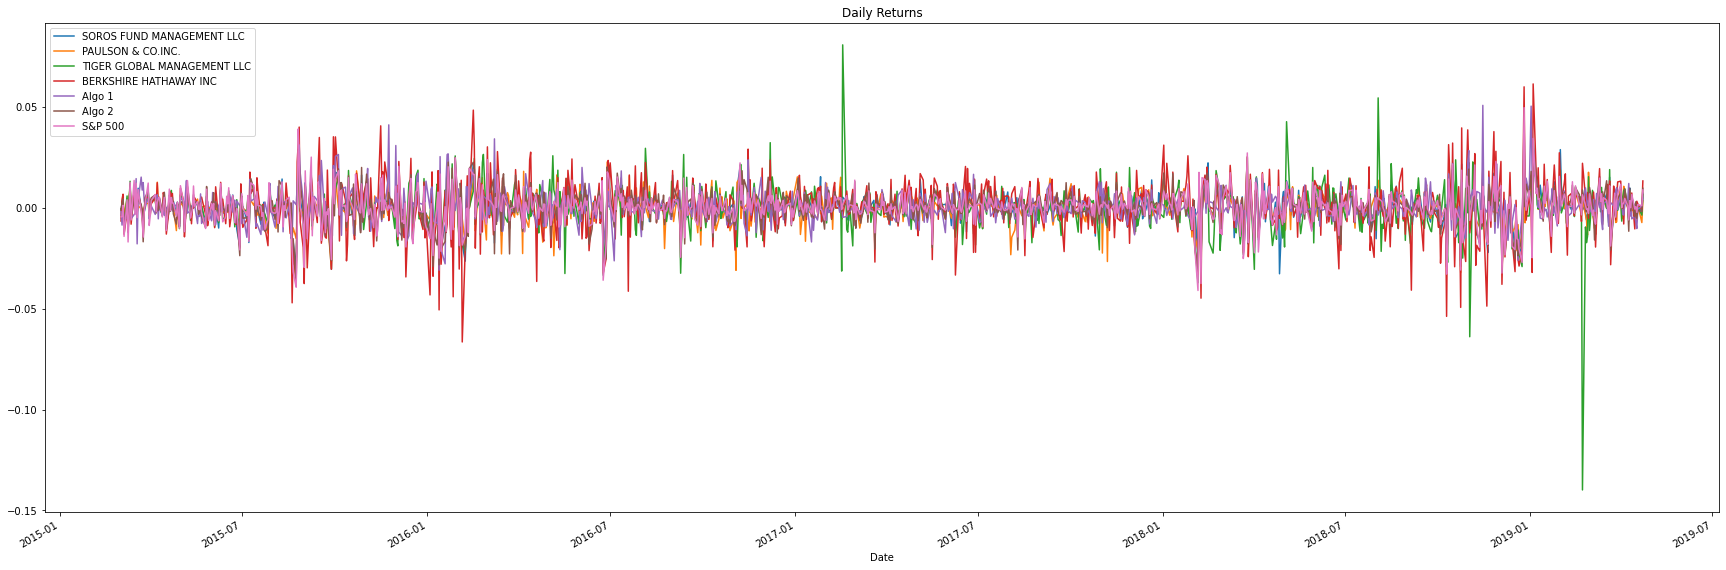

In [540]:
# Plot daily returns

combined1.plot(figsize=(30,10), title='Daily Returns')

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

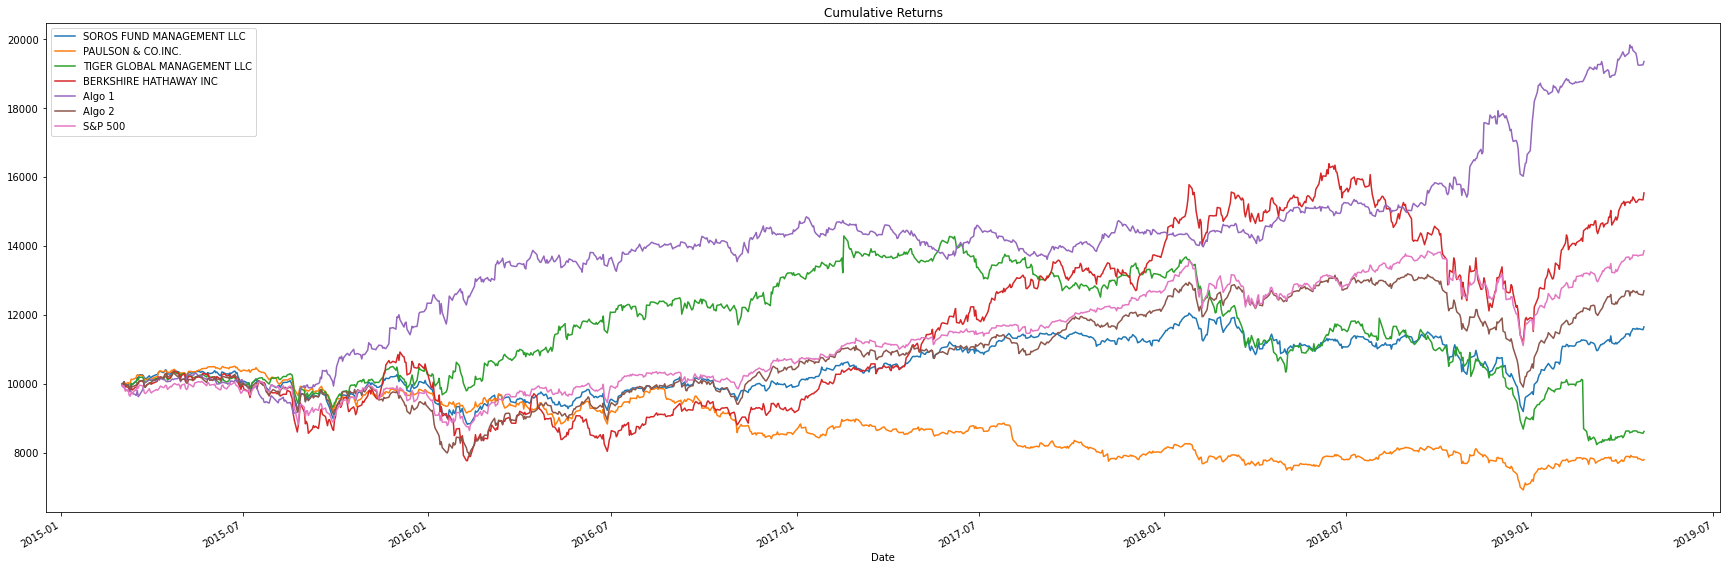

In [541]:
# Plot cumulative returns

initial_investment = 10000

cumulative_returns = (1 + combined1).cumprod()
(initial_investment * cumulative_returns).plot(figsize=(30,10), title='Cumulative Returns')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

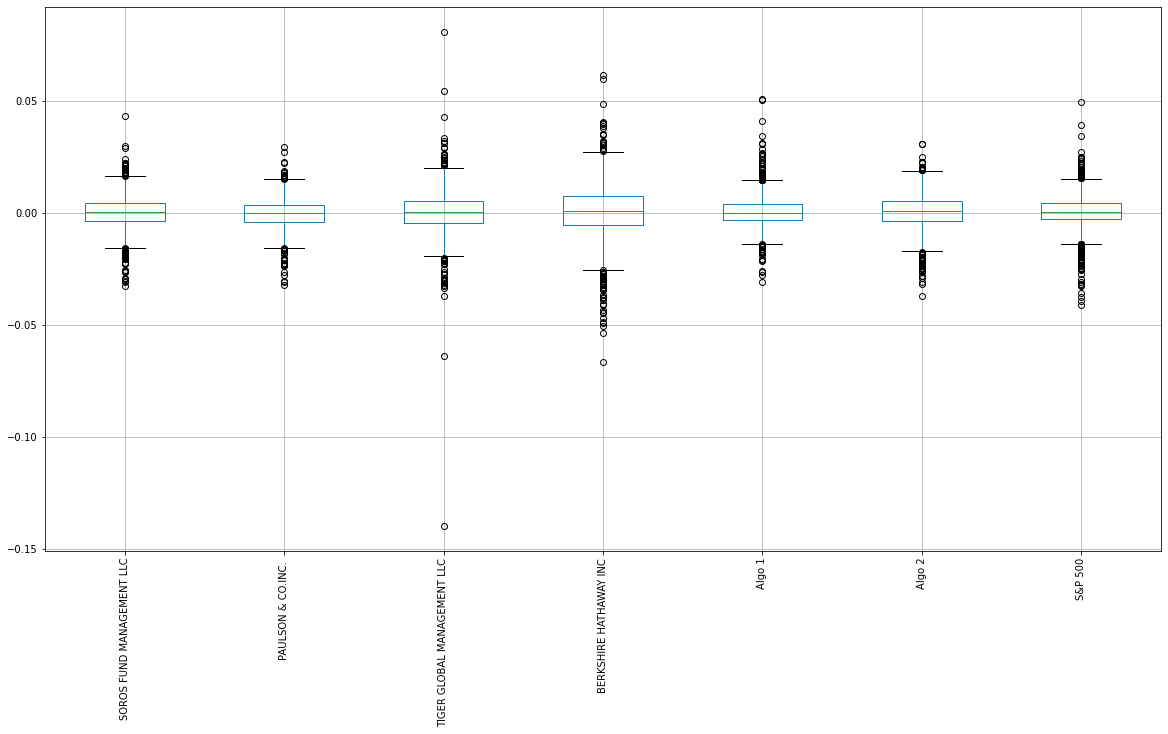

In [542]:
# Plotted a box plot for each portfolio

import matplotlib.pyplot as plt

combined1.boxplot(rot=90, figsize=(20, 10))

<AxesSubplot:title={'center':'Soros Cumulative Returns'}, xlabel='Date'>

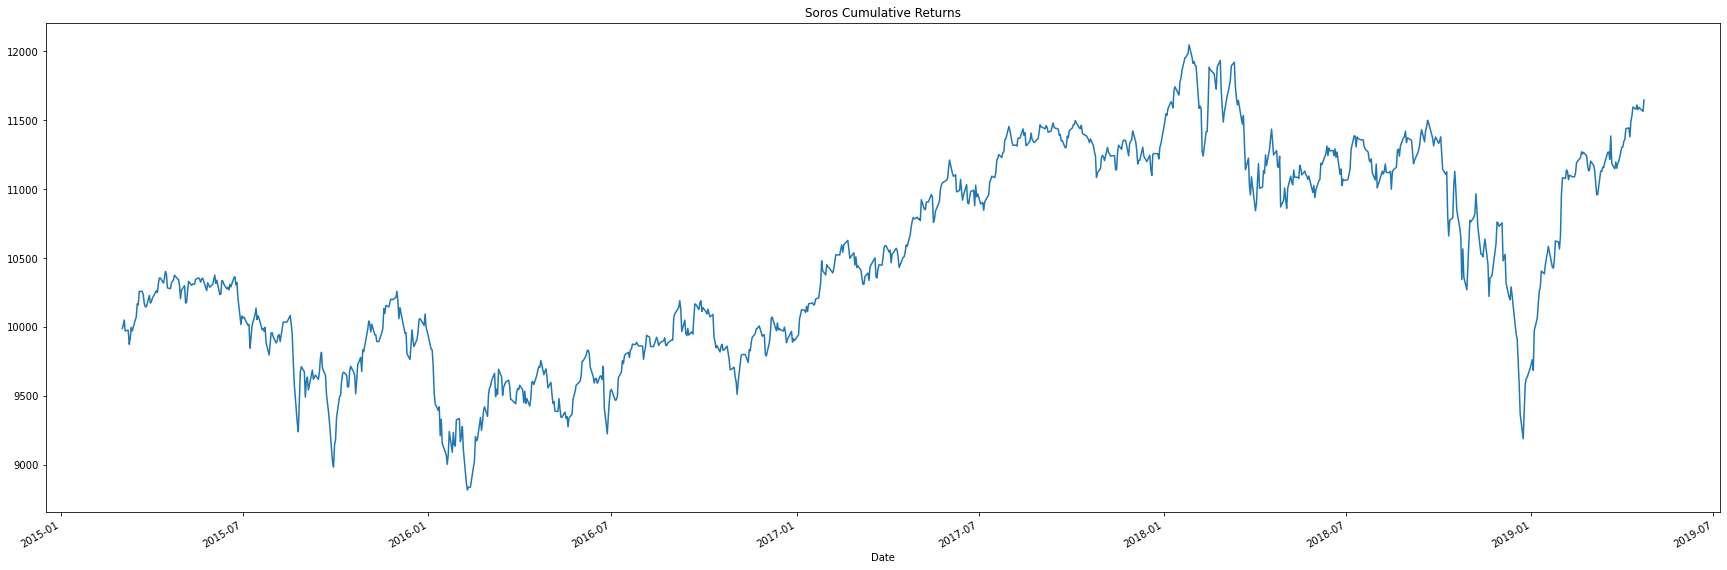

In [543]:
# Plot Cumulative Returns - SOROS FUND MANAGEMENT LLC

initial_investment = 10000

cumulative_returns = (1 + combined1["SOROS FUND MANAGEMENT LLC"]).cumprod()
(initial_investment * cumulative_returns).plot(figsize=(30,10), title='Soros Cumulative Returns')

<AxesSubplot:title={'center':'Paulson Cumulative Returns'}, xlabel='Date'>

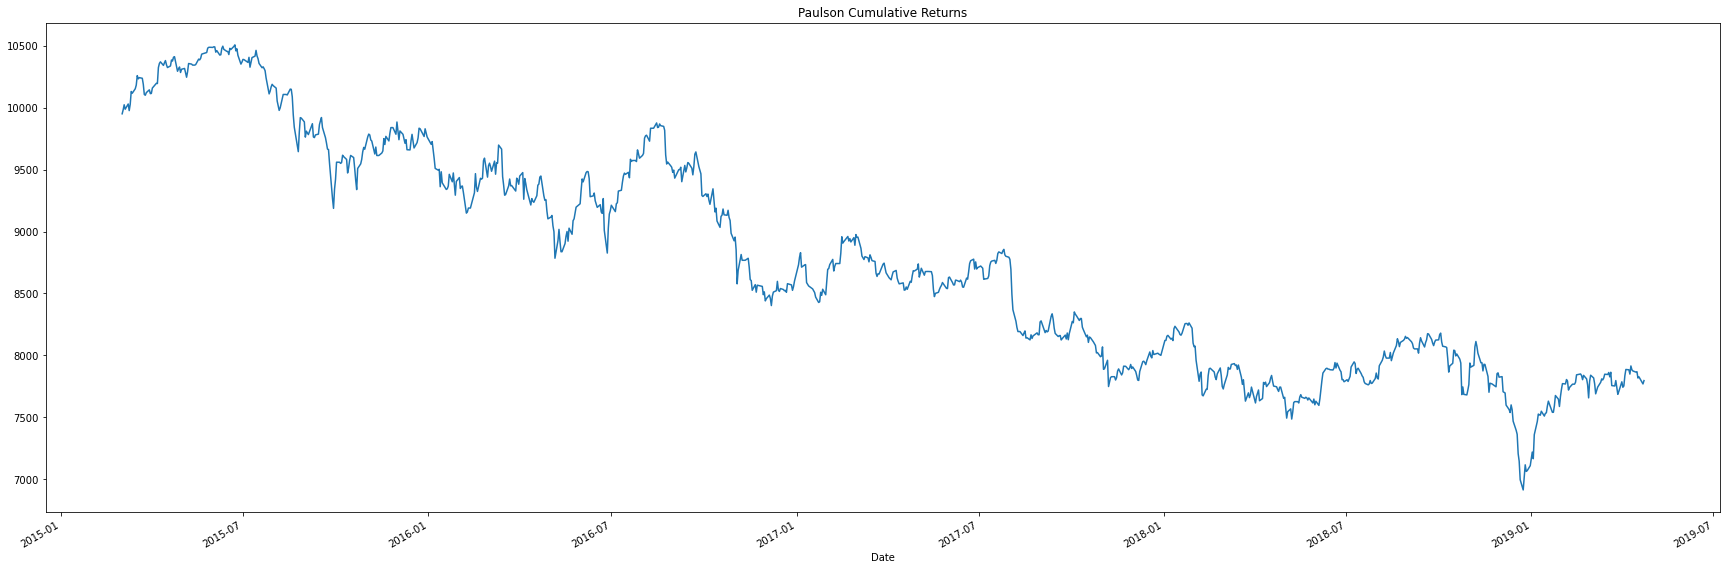

In [544]:
# Plot Cumulative Returns - PAULSON & CO.INC. 

initial_investment = 10000

cumulative_returns = (1 + combined1["PAULSON & CO.INC. "]).cumprod()
(initial_investment * cumulative_returns).plot(figsize=(30,10), title='Paulson Cumulative Returns')

<AxesSubplot:title={'center':'Tiger Cumulative Returns'}, xlabel='Date'>

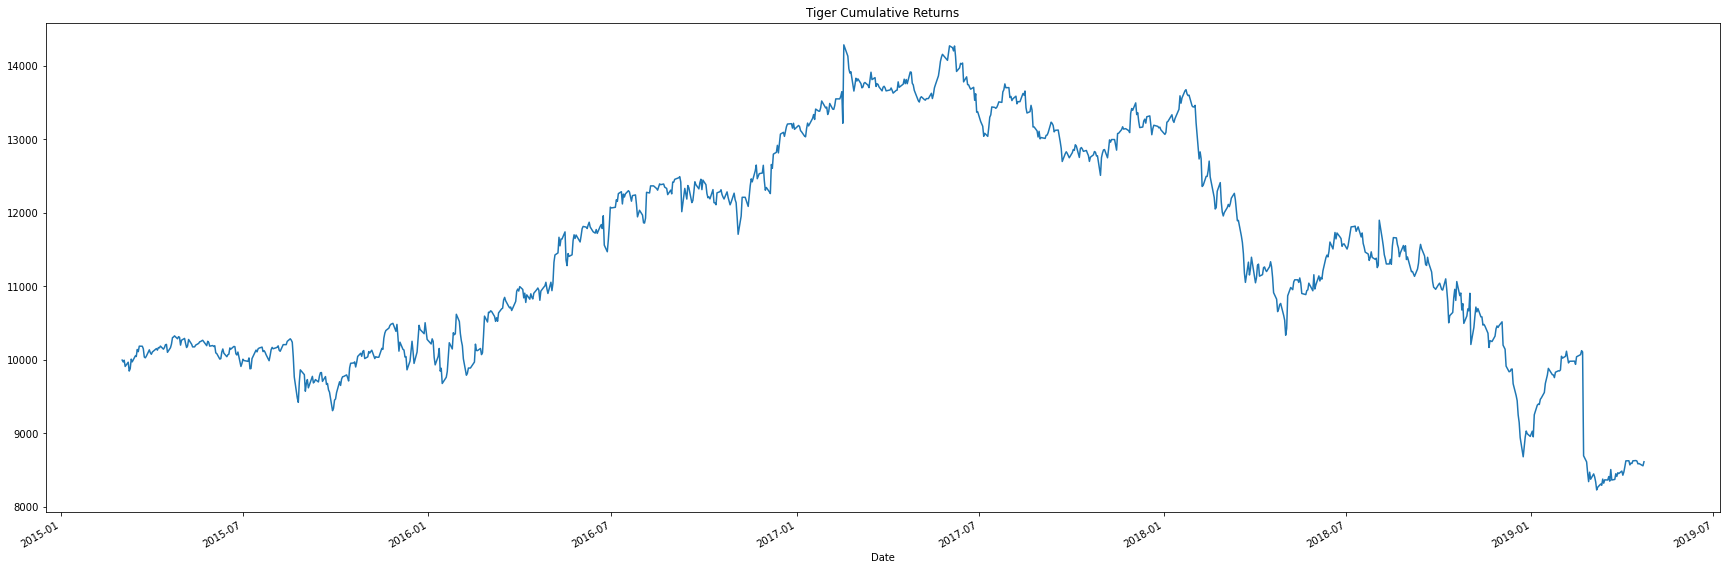

In [545]:
# Plot Cumulative Returns - TIGER GLOBAL MANAGEMENT LLC

initial_investment = 10000

cumulative_returns = (1 + combined1["TIGER GLOBAL MANAGEMENT LLC"]).cumprod()
(initial_investment * cumulative_returns).plot(figsize=(30,10), title='Tiger Cumulative Returns')

<AxesSubplot:title={'center':'Berkshire Hathaway Cumulative Returns'}, xlabel='Date'>

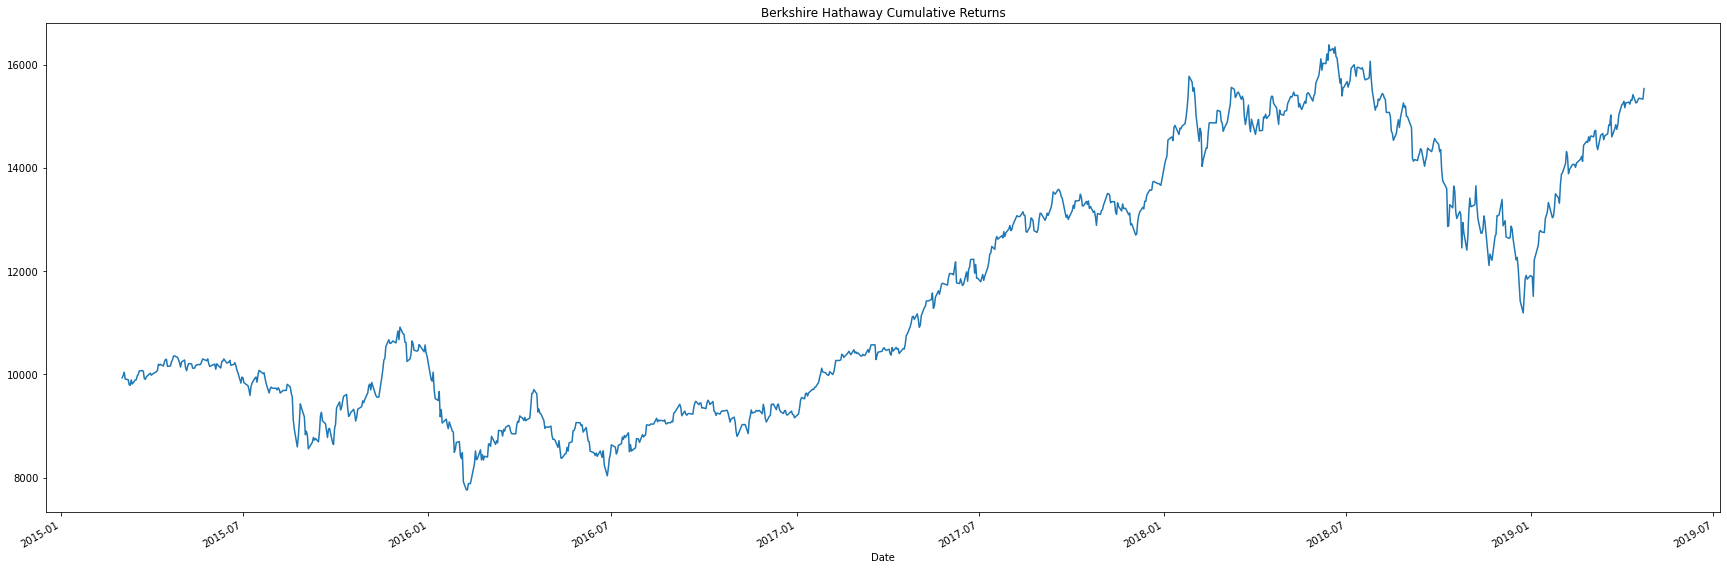

In [546]:
# Plot Cumulative Returns - BERKSHIRE HATHAWAY INC

initial_investment = 10000

cumulative_returns = (1 + combined1["BERKSHIRE HATHAWAY INC"]).cumprod()
(initial_investment * cumulative_returns).plot(figsize=(30,10), title='Berkshire Hathaway Cumulative Returns')

<AxesSubplot:title={'center':'Algo 1 Cumulative Returns'}, xlabel='Date'>

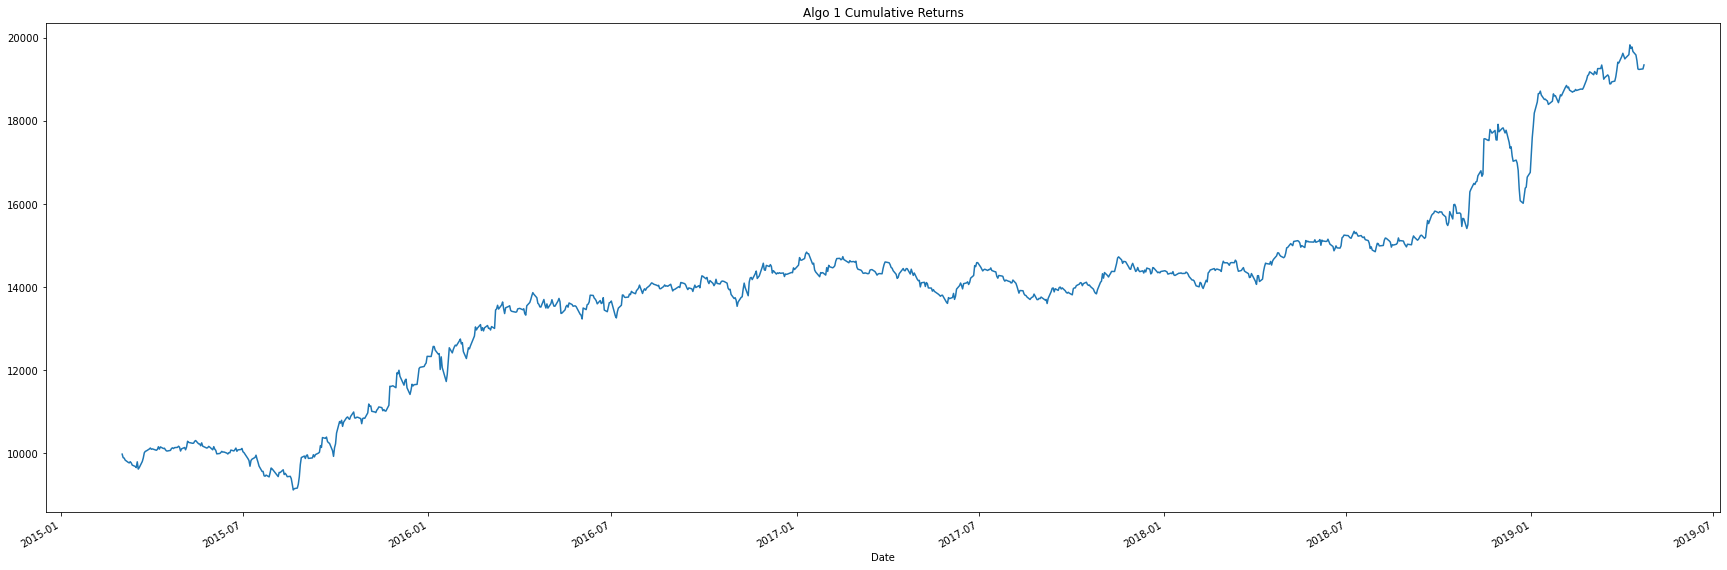

In [547]:
# Plot Cumulative Returns - Algo 1

initial_investment = 10000

cumulative_returns = (1 + combined1["Algo 1"]).cumprod()
(initial_investment * cumulative_returns).plot(figsize=(30,10), title='Algo 1 Cumulative Returns')

<AxesSubplot:title={'center':'Algo 2 Cumulative Returns'}, xlabel='Date'>

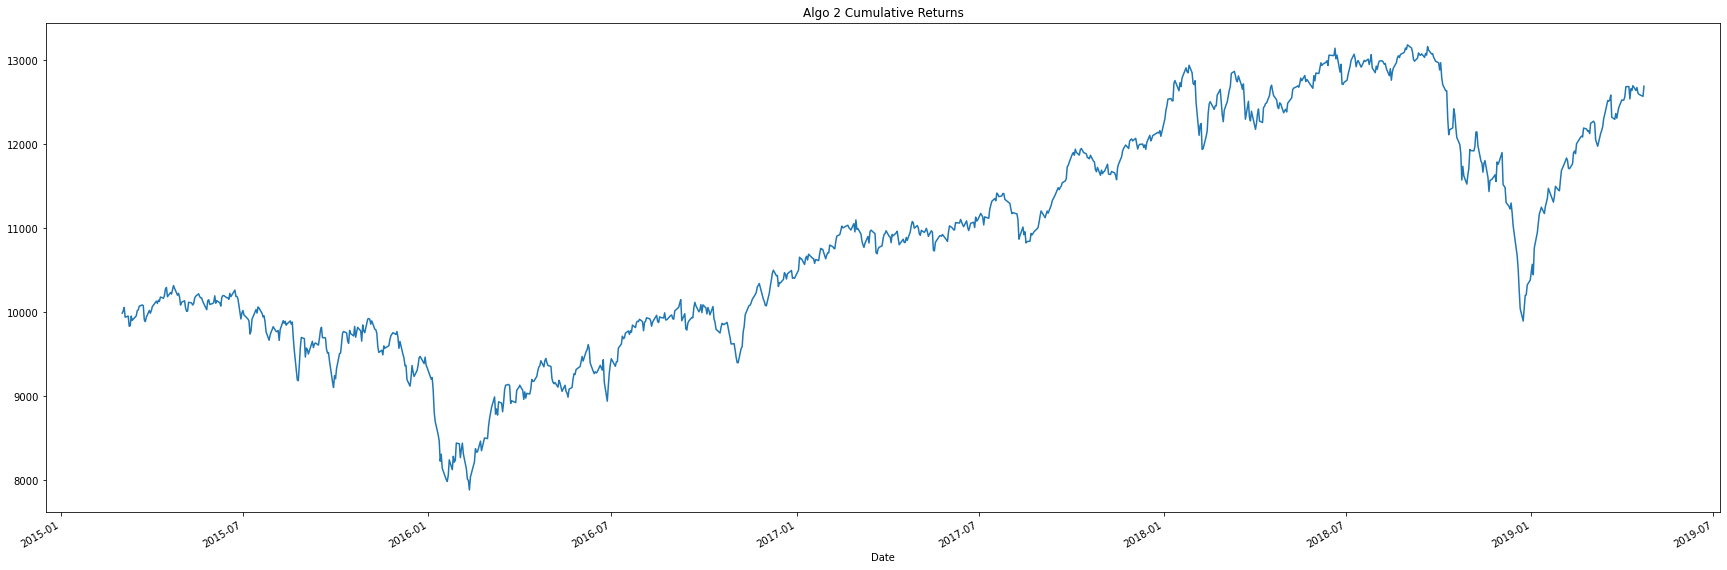

In [548]:
# Plot Cumulative Returns - Algo 2

initial_investment = 10000

cumulative_returns = (1 + combined1["Algo 2"]).cumprod()
(initial_investment * cumulative_returns).plot(figsize=(30,10), title='Algo 2 Cumulative Returns')

<AxesSubplot:title={'center':'S&P 500 Cumulative Returns'}, xlabel='Date'>

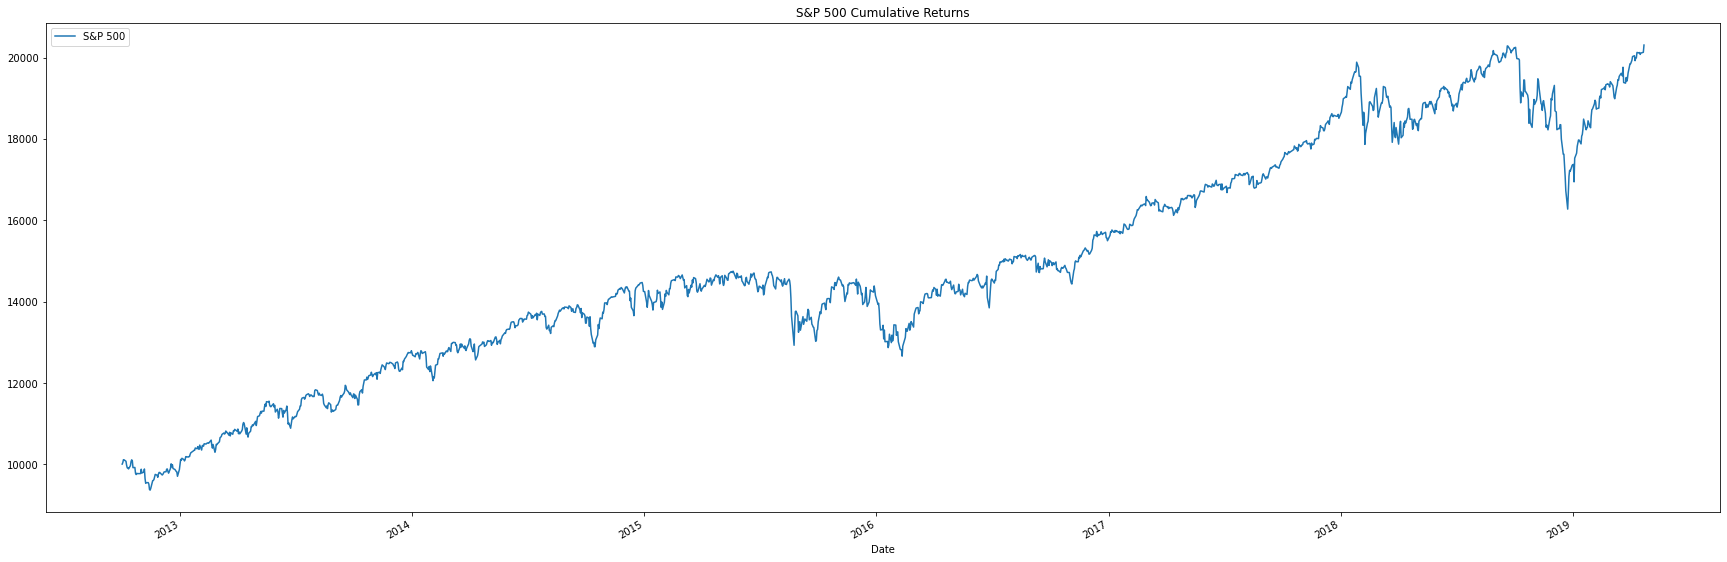

In [549]:
# Plot Cumulative Returns - sp500_returns

initial_investment = 10000

cumulative_returns = (1 + sp500_returns).cumprod()
(initial_investment * cumulative_returns).plot(figsize=(30,10), title='S&P 500 Cumulative Returns')

In [550]:
# Calculate the Daily Standard Deviations for each portfolio

print(f'{combined1.std()}')

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64


In [551]:
# Which portfolios are riskier than the S&P 500?

sp500_std=combined1.std().loc['S&P 500'] # Define sp500_std as the Standard Deviation for the S&P 500

combined_std=combined1.std() # Define combined_std as the Standard Deviations for each portfolio within combined1 (as a list)

combined_std.loc[combined_std>sp500_std] # Return those portfolios whose standard deviation is greater than that of the S&P 500

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [552]:
# Determine which portfolios are riskier than the S&P 500

volatility_SP = sp500_returns.std() * np.sqrt(252)
volatility_SP

S&P 500    0.128762
dtype: float64

In [553]:
# Calculate the annualized standard deviation (252 trading days)

volatility = combined1.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

In [554]:
sp500_std=combined1.std().loc['S&P 500'] * np.sqrt(252) # Define sp500_std as the anualized Standard Deviation for the S&P 500

combined_std=combined1.std() * np.sqrt(252) # Define combined_std as the anualized Standard Deviations for each portfolio within combined1 (as a list)

combined_std.loc[combined_std>sp500_std] # Return those portfolios whose standard deviation is greater than that of the S&P 500

TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

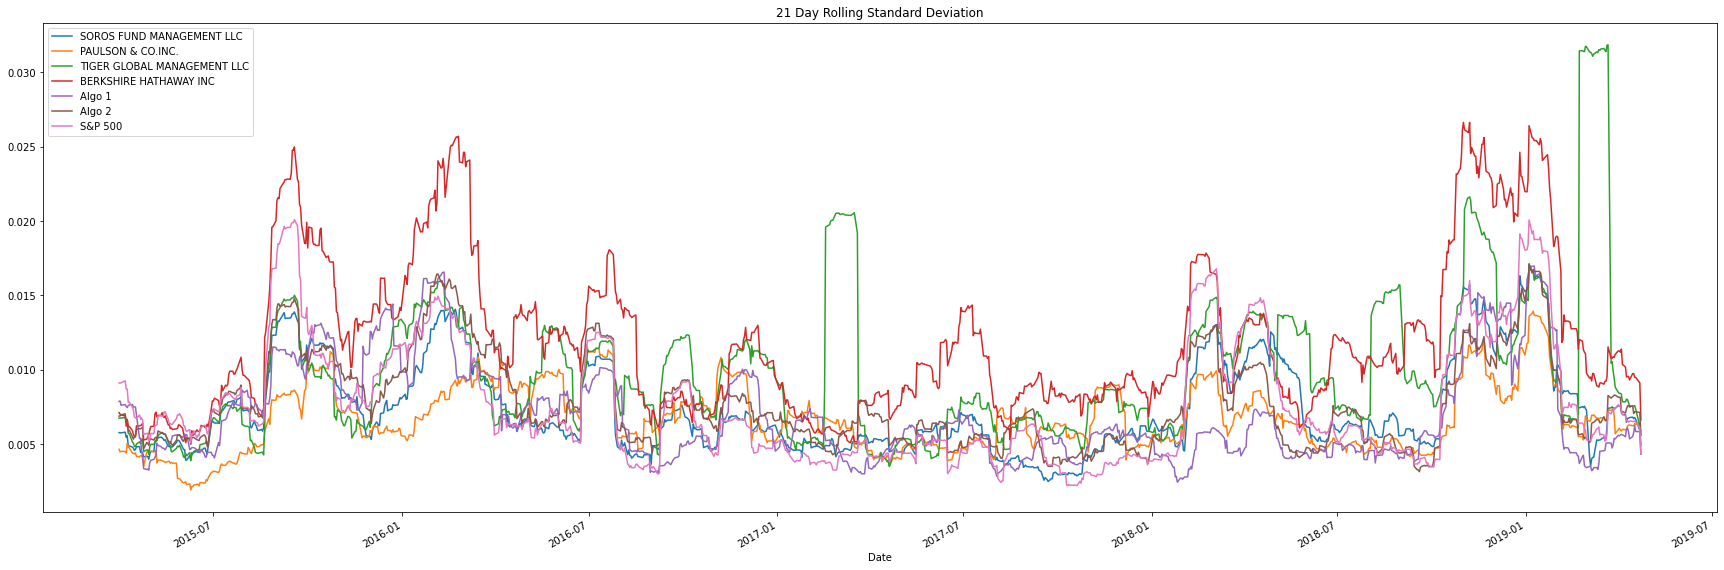

In [555]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

combined1.rolling(window=21).std().plot(figsize=(30,10), title='21 Day Rolling Standard Deviation')

In [556]:
# Construct a correlation table

correlation = combined1.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC Beta'}, xlabel='Date'>

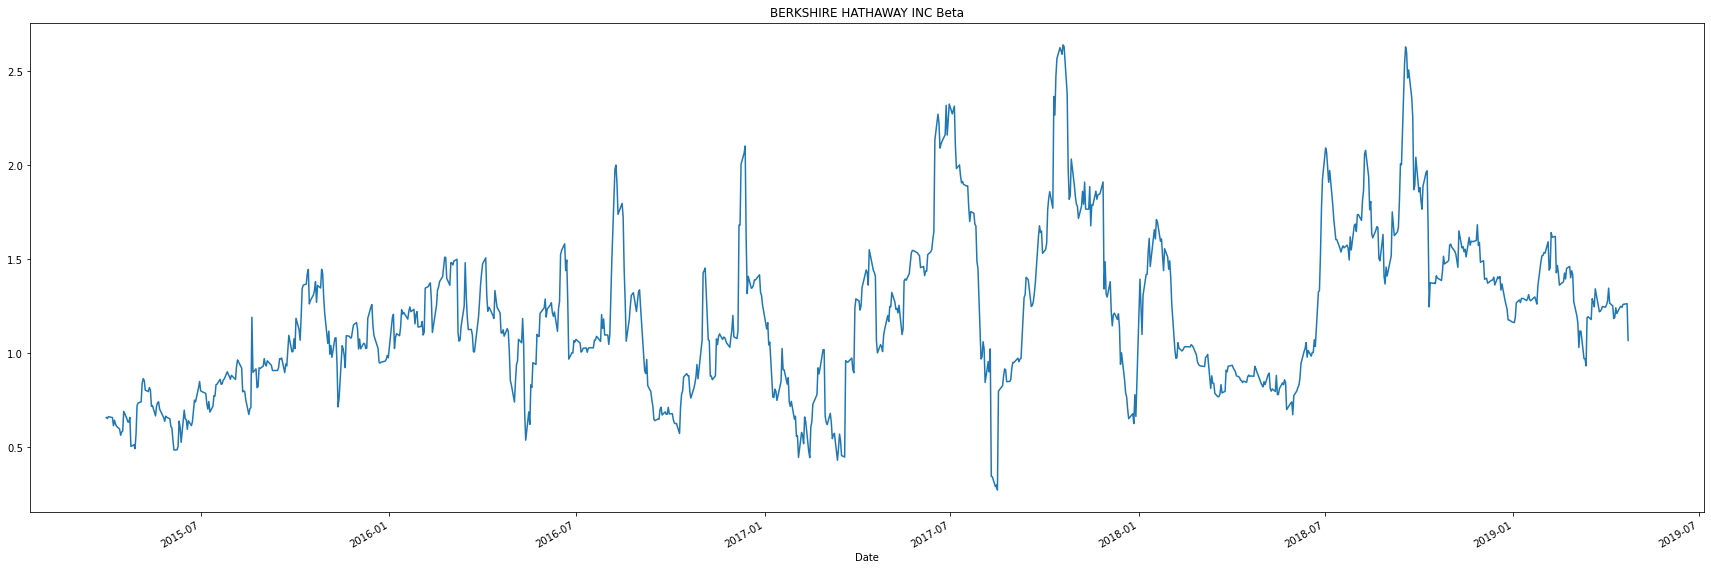

In [557]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

# Calculate 21-day rolling covariance of all daily returns of BERKSHIRE HATHAWAY INC vs. S&P 500

covariance = combined1['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined1['S&P 500'])

# Calculate 21-day rolling variance of all daily returns of BERKSHIRE HATHAWAY INC
variance = combined1['S&P 500'].rolling(window=21).var()

# Calculate beta of all daily returns of BERKSHIRE HATHAWAY INC
berk_beta = covariance / variance

# print(f'The Beta of of all daily returns of BERKSHIRE HATHAWAY INC is {berk_beta}')

berk_beta.plot(figsize=(30,10), title='BERKSHIRE HATHAWAY INC Beta')

<AxesSubplot:xlabel='Date'>

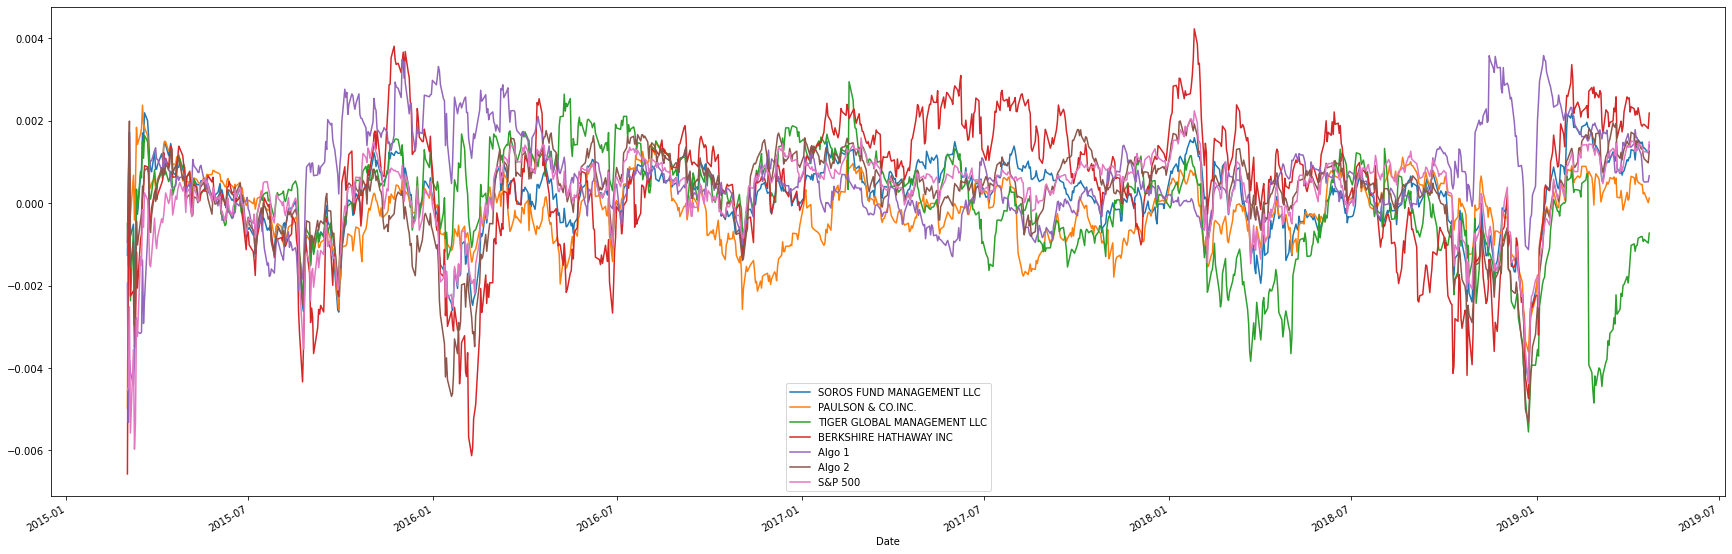

In [558]:
# Calculate a rolling window using the exponentially weighted moving average. 

# combined1.ewm(halflife=21).mean().plot(figsize=(30,10))

combined1_ewm = combined1.ewm(halflife=21)
combined1_ewm.mean().plot(figsize=(30,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [559]:
# Calculate annualized Sharpe Ratios

sharpe_ratios = (combined1.mean() * 252) / (combined1.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

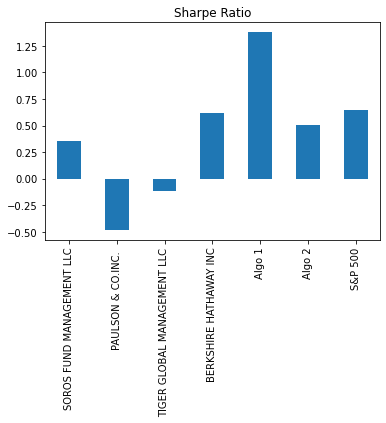

In [560]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar(title='Sharpe Ratio')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: Yes, Algo 1 outperforms all of the Whale portfolios and the Market, however Algo 2 does not outperform Berkshire Hathaway or the Market.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [561]:
# Reading Church & Dwight historical prices

chd_historical_csv = Path("Resources/chd_historical.csv")
chd_historical = pd.read_csv(chd_historical_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

chd_historical

,Close
Date,
2018-05-11,47.46
2018-05-14,47.04
2018-05-15,46.52
2018-05-16,46.61
2018-05-17,46.69
...,...
2019-05-02,74.66
2019-05-03,74.34
2019-05-06,73.85


In [562]:
# Reading Tesla historical prices

tsla_historical_csv = Path("Resources/tsla_historical.csv")
tsla_historical = pd.read_csv(tsla_historical_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

tsla_historical

,Close
Date,
2018-05-11,60.21
2018-05-14,58.39
2018-05-15,56.84
2018-05-16,57.30
2018-05-17,56.91
...,...
2019-05-02,48.82
2019-05-03,51.01
2019-05-06,51.07


In [563]:
# Reading Qualcomm historical prices

qcom_historical_csv = Path("Resources/qcom_historical.csv")
qcom_historical = pd.read_csv(qcom_historical_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

qcom_historical

,Close
Date,
2018-05-11,55.23
2018-05-14,56.74
2018-05-15,55.64
2018-05-16,56.70
2018-05-17,56.95
...,...
2019-05-02,87.14
2019-05-03,89.29
2019-05-06,88.25


In [564]:
# Concatenate all stocks into a single DataFrame

portfolio = pd.concat([chd_historical, tsla_historical, qcom_historical], axis="columns", join="inner")
portfolio.head()

,Close,Close,Close
Date,,,
2018-05-11,47.46,60.21,55.23
2018-05-14,47.04,58.39,56.74
2018-05-15,46.52,56.84,55.64
2018-05-16,46.61,57.30,56.70
2018-05-17,46.69,56.91,56.95


In [565]:
# Reset the index

# There was no need to do this as the csv file created by Googe Finance for my tickers did not have the info that would have created a need to reset the index -- here is the code incase I needed to:

# portfolio = pd.concat([CHD, TSLA, QCOM], axis="rows", join="inner")
# portfolio = portfolio.reset_index()
# portfolio = portfolio.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
# portfolio.head()

In [566]:
# Pivot so that each column of prices represents a unique symbol

columns = ["CHD", "TSLA", "QCOM"]
portfolio.columns = columns
portfolio.head()

,CHD,TSLA,QCOM
Date,,,
2018-05-11,47.46,60.21,55.23
2018-05-14,47.04,58.39,56.74
2018-05-15,46.52,56.84,55.64
2018-05-16,46.61,57.30,56.70
2018-05-17,46.69,56.91,56.95


In [567]:
# Calculate Daily Returns
portfolio_returns = portfolio.pct_change()
portfolio_returns.head()

,CHD,TSLA,QCOM
Date,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.008850,-0.030228,0.027340
2018-05-15,-0.011054,-0.026546,-0.019387
2018-05-16,0.001935,0.008093,0.019051
2018-05-17,0.001716,-0.006806,0.004409


In [568]:
# Drop Nulls

portfolio_returns.dropna(inplace=True)
portfolio_returns.isnull().sum()
portfolio_returns

,CHD,TSLA,QCOM
Date,,,
2018-05-14,-0.008850,-0.030228,0.027340
2018-05-15,-0.011054,-0.026546,-0.019387
2018-05-16,0.001935,0.008093,0.019051
2018-05-17,0.001716,-0.006806,0.004409
2018-05-18,-0.012208,0.000000,0.009833
...,...,...,...
2019-05-02,0.013851,0.043162,0.008915
2019-05-03,-0.004286,0.044859,0.024673
2019-05-06,-0.006591,0.001176,-0.011647


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [569]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

chd_weight = 1/3
tsla_weight = 1/3
qcom_weight = 1/3

portfolio_returns = chd_weight * portfolio_returns["CHD"] + tsla_weight * portfolio_returns["TSLA"] + qcom_weight * portfolio_returns["QCOM"]
# portfolio_returns.column("Custom")
portfolio_returns.head()

Date
2018-05-14   -0.003912
2018-05-15   -0.018996
2018-05-16    0.009693
2018-05-17   -0.000227
2018-05-18   -0.000792
dtype: float64

In [570]:
columns1 = ["Custom Portfolio"]
portfolio_returns.columns = columns1
portfolio_returns.head()

Date
2018-05-14   -0.003912
2018-05-15   -0.018996
2018-05-16    0.009693
2018-05-17   -0.000227
2018-05-18   -0.000792
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [571]:
# Add your "Custom" portfolio to the larger dataframe of fund returns

combined2 = pd.concat([combined1, portfolio_returns], axis="columns", join="inner")
columns2 = ["Soros", "Paulson", "Tiger", "Berkshire", "Algo 1", "Algo 2", "S&P 500", "Custom"]
combined2.columns = columns2
combined2.head()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.003912
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.018996
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009693
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.000227
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.000792


In [572]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Drop Nulls

combined2.dropna(inplace=True)
combined2.isnull().sum()
combined2

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.003912
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.018996
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009693
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.000227
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.000792
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.085151
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.038634
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.006687


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [573]:
# Risk

print(f'{combined2.std()}') # Daily Standard Deviation

Soros        0.009240
Paulson      0.007353
Tiger        0.014648
Berkshire    0.015569
Algo 1       0.008423
Algo 2       0.008791
S&P 500      0.009578
Custom       0.016911
dtype: float64


In [574]:
# Risk

volatility = combined2.std() * np.sqrt(252) # Calculate the annualized standard deviation (252 trading days)
volatility

Soros        0.146675
Paulson      0.116732
Tiger        0.232531
Berkshire    0.247155
Algo 1       0.133704
Algo 2       0.139556
S&P 500      0.152054
Custom       0.268457
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

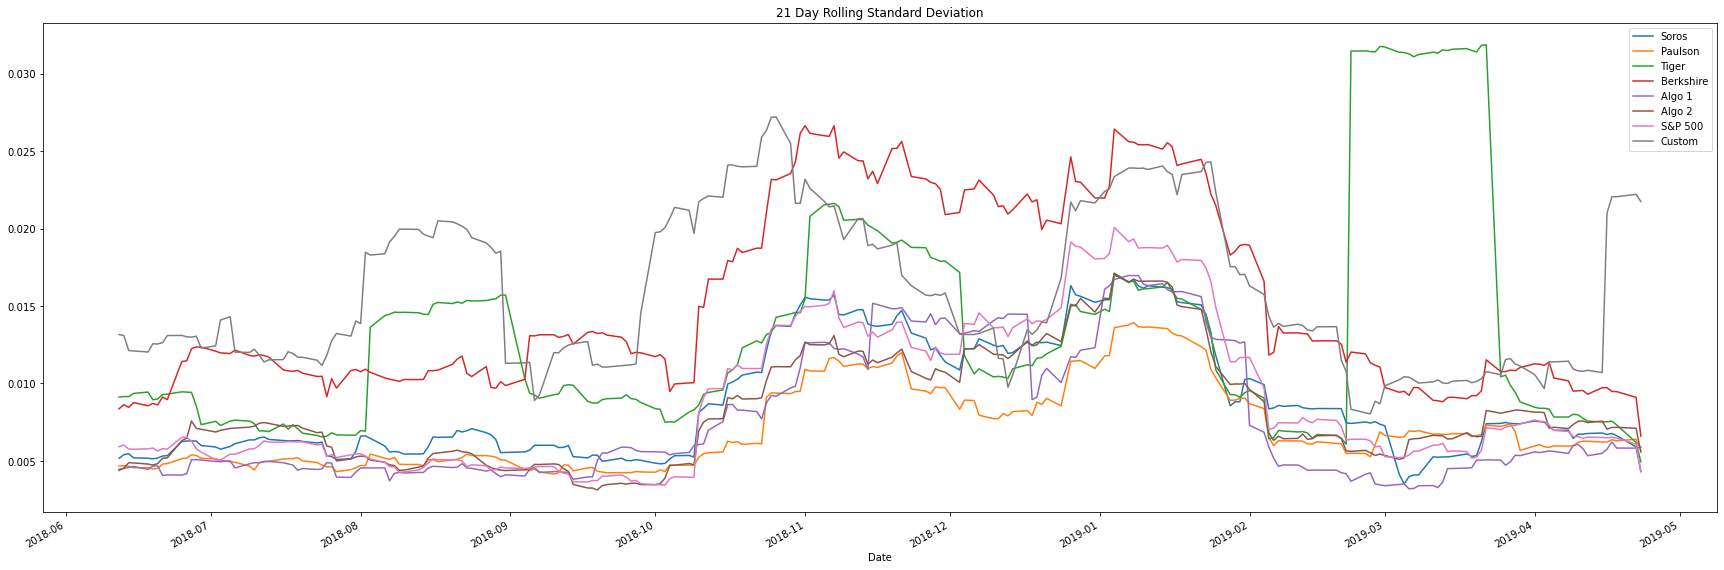

In [575]:
# Rolling
# Calculate and plot the rolling standard deviation for the portfolios and S&P 500

combined2.rolling(window=21).std().plot(figsize=(30,10), title='21 Day Rolling Standard Deviation')

In [576]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined2.mean() * 252) / (combined2.std() * np.sqrt(252))
sharpe_ratios

Soros        0.430713
Paulson      0.258738
Tiger       -1.034216
Berkshire    0.159756
Algo 1       2.035665
Algo 2       0.080607
S&P 500      0.584820
Custom       1.333090
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

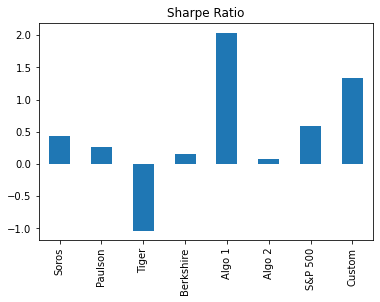

In [577]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar(title='Sharpe Ratio')

In [578]:
# Create a correlation analysis

correlation = combined2.corr()
correlation

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500,Custom
Soros,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.452170
Paulson,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.370831
Tiger,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.255500
Berkshire,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.471377
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.093038
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.433438
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.503798
Custom,0.452170,0.370831,0.255500,0.471377,0.093038,0.433438,0.503798,1.000000


<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

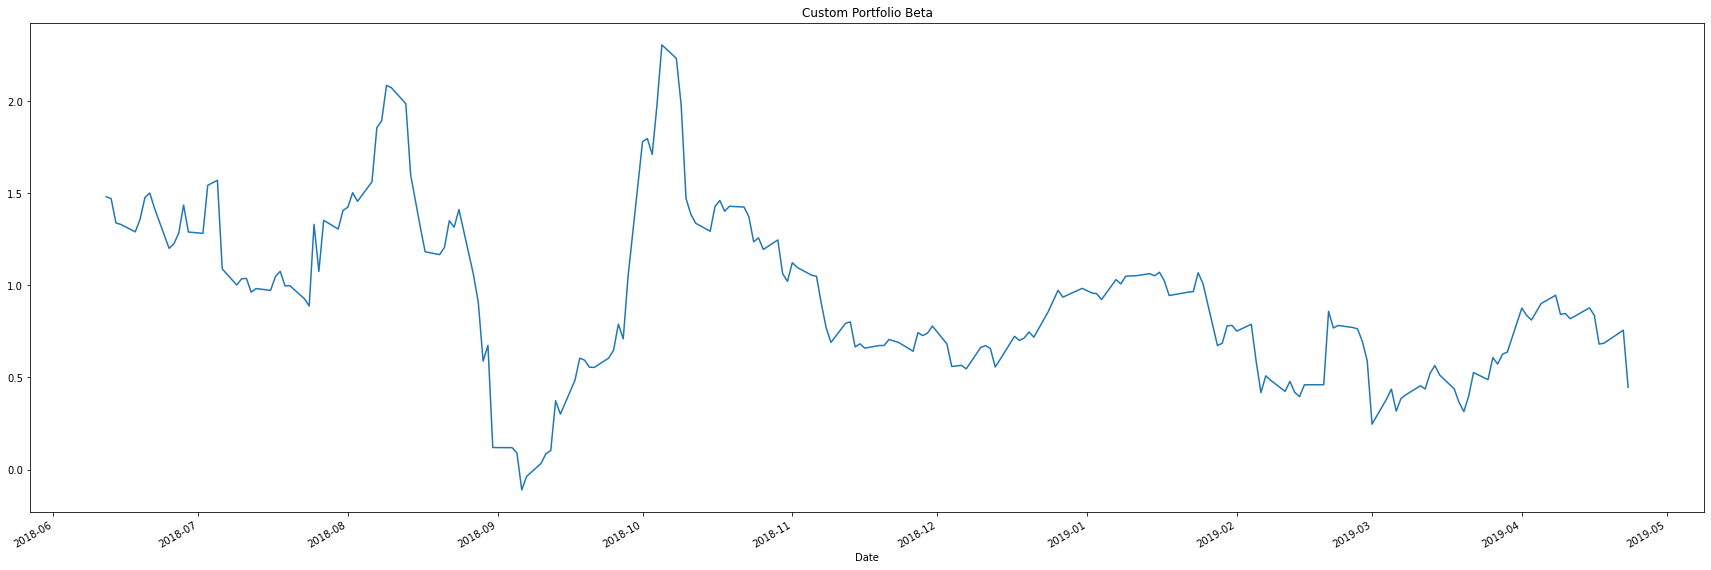

In [579]:
# Beta for the Custom single portfolio compared to the total market (S&P 500)

# Calculate 21-day rolling covariance of all daily returns of Custom vs. S&P 500

covariance = combined2['Custom'].rolling(window=21).cov(combined2['S&P 500'])

# Calculate 21-day rolling variance of all daily returns of CustomC
variance = combined2['S&P 500'].rolling(window=21).var()

# Calculate beta of all daily returns of BERKSHIRE HATHAWAY INC
custom_beta = covariance / variance

custom_beta.plot(figsize=(30,10), title='Custom Portfolio Beta')